In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pycaret.regression import *
from sklearn.model_selection import train_test_split

# Índice de Liberdade Econômica

In [2]:
#Importando dataset com dados do índice de liberdade econômica
liberdade_caminho = "./liberdade_economica/heritage_org_2020.csv"
liberdade = pd.read_csv(liberdade_caminho)

In [3]:
#Verificando a dimensão dos dados importados
liberdade.shape

(186, 15)

In [5]:
liberdade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    186 non-null    object 
 1   Index Year              186 non-null    int64  
 2   Overall Score           180 non-null    float64
 3   Property Rights         185 non-null    float64
 4   Government Integrity    185 non-null    float64
 5   Judicial Effectiveness  185 non-null    float64
 6   Tax Burden              180 non-null    float64
 7   Government Spending     183 non-null    float64
 8   Fiscal Health           182 non-null    float64
 9   Business Freedom        185 non-null    float64
 10  Labor Freedom           184 non-null    float64
 11  Monetary Freedom        184 non-null    float64
 12  Trade Freedom           182 non-null    float64
 13  Investment Freedom      184 non-null    float64
 14  Financial Freedom       181 non-null    fl

In [6]:
#Como o arquivo importado só possui dados de 2020, removemos a coluna ano
liberdade.drop(columns=['Index Year'], inplace=True)

In [7]:
#Traduzindo o nome das colunas
#ILE: Índice de liberdade econômica

liberdade.rename(columns={"Name": "pais",
                     "Overall Score": "ILE",
                     "Property Rights": "propriedade",
                     "Government Integrity": "governo_integridade",
                     "Judicial Effectiveness": "judiciario",
                     "Tax Burden": "tributos",
                     "Government Spending": "governo_gastos",
                     "Fiscal Health": "saude_fiscal",
                     "Business Freedom": "negocios",
                     "Labor Freedom": "trabalho",
                     "Monetary Freedom": "monetaria",
                     "Trade Freedom": "comercial",
                     "Investment Freedom": "investimentos",
                     "Financial Freedom": "financeira"}, inplace=True)

In [8]:
#Primeira observação dos dados de Liberdade Econômica importados
#Aqui vemos que existe uma linha para cada país
liberdade.head(10)

,pais,ILE,propriedade,governo_integridade,judiciario,tributos,governo_gastos,saude_fiscal,negocios,trabalho,monetaria,comercial,investimentos,financeira
0,Afghanistan,54.7,48.3,24.8,30.0,91.4,79.2,99.9,54.7,61.6,81.0,66.0,10.0,10.0
1,Albania,66.9,57.1,38.8,33.0,85.9,74.6,86.3,65.7,52.1,81.2,88.4,70.0,70.0
2,Algeria,46.9,37.9,28.3,35.0,75.4,52.6,17.3,63.0,50.5,76.2,66.2,30.0,30.0
3,Angola,52.2,36.9,15.1,14.3,87.3,85.7,71.9,57.7,61.1,59.6,66.2,30.0,40.0
4,Argentina,53.1,50.5,49.7,47.0,69.6,50.7,24.7,60.2,46.5,53.7,69.2,55.0,60.0
5,Armenia,70.6,60.7,43.4,54.1,84.9,80.6,68.8,81.0,72.5,76.0,80.6,75.0,70.0
6,Australia,82.6,82.8,89.3,86.1,63.0,61.6,91.8,87.8,84.0,86.2,88.2,80.0,90.0
7,Austria,73.3,87.3,84.0,73.2,51.3,27.2,87.9,73.0,68.3,81.0,86.4,90.0,70.0
8,Azerbaijan,69.3,67.1,38.7,53.9,88.0,63.0,99.2,80.8,66.2,69.8,74.6,70.0,60.0
9,Bahrain,66.3,70.6,51.0,48.4,99.4,66.1,2.6,70.5,71.1,81.1,79.4,75.0,80.0


In [9]:
#Verificando se existem objetos nulos
liberdade.info()

#Dos 186 países com dados, há Índice de Liberdade Econômica para 180 deles

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pais                 186 non-null    object 
 1   ILE                  180 non-null    float64
 2   propriedade          185 non-null    float64
 3   governo_integridade  185 non-null    float64
 4   judiciario           185 non-null    float64
 5   tributos             180 non-null    float64
 6   governo_gastos       183 non-null    float64
 7   saude_fiscal         182 non-null    float64
 8   negocios             185 non-null    float64
 9   trabalho             184 non-null    float64
 10  monetaria            184 non-null    float64
 11  comercial            182 non-null    float64
 12  investimentos        184 non-null    float64
 13  financeira           181 non-null    float64
dtypes: float64(13), object(1)
memory usage: 20.5+ KB


In [10]:
# Quais são os países que possuem dados nulos?
liberdade_nulo_verdadeiro = liberdade.isnull()
liberade_linhas_com_nulo = liberdade_nulo_verdadeiro.any(axis=1)
liberdade_nulos = liberdade[liberade_linhas_com_nulo]
liberdade_nulos
#Verifica-se que países que tenham qualquer uma da métricas com valor nulo não tivem o seu
#Índice de Liberdade Econômica calculado.

#Os países são Iraque, Líbia, Liechtenstein, Somália, Síria e Iémen
#Exceto por Liechtenstein, os outros países enfrentaram conflitos armados nos anos recentes,
#o que pode justificar a ausência de dados

#Consultando a fonte de dados (https://www.heritage.org/index/ranking) estes países não foram rankeados
#por não haver confiança nos dados.
#É possível verificar a justificativa para cada país individualmente clicando no link correspondente na página de ranking

#Como tratar estes dados?
#Os dados nulos serão preenchidos com a médias dos valores existentes

,pais,ILE,propriedade,governo_integridade,judiciario,tributos,governo_gastos,saude_fiscal,negocios,trabalho,monetaria,comercial,investimentos,financeira
75,Iraq,NaN,43.9,20.8,11.2,NaN,59.5,76.6,52.6,44.8,76.4,NaN,NaN,NaN
93,Libya,NaN,30.1,18.9,20.8,NaN,0.0,NaN,40.7,53.9,53.6,NaN,5.0,NaN
94,Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,80.0
150,Somalia,NaN,20.1,13.1,26.5,NaN,NaN,NaN,31.6,NaN,NaN,NaN,NaN,NaN
159,Syria,NaN,45.6,21.9,20.8,NaN,NaN,NaN,48.9,59.3,58.8,51.6,0.0,NaN
183,Yemen,NaN,22.5,21.9,20.1,NaN,96.5,60.1,43.9,43.8,42.6,70.0,50.0,NaN


In [11]:
#Médias dos valores disponíveis de países com valores nulos
liberdade_nulos.mean(axis=1)

75     48.2250
93     27.8750
94     82.5000
150    22.8250
159    38.3625
183    47.1400
dtype: float64

In [12]:
#Substituindo valores nulos pelas médias
liberdade = liberdade.T.fillna(liberdade.mean(axis=1)).T

# Caso fosse excluir os países com valores nulos, executaria o comando comentado abaixo
# liberdade.dropna(axis=0, how='any', inplace=True)

In [13]:
#Conferindo a operação
liberdade[liberade_linhas_com_nulo]

,pais,ILE,propriedade,governo_integridade,judiciario,tributos,governo_gastos,saude_fiscal,negocios,trabalho,monetaria,comercial,investimentos,financeira
75,Iraq,48.225,43.9,20.8,11.2,48.225,59.5,76.6,52.6,44.8,76.4,48.225,48.225,48.225
93,Libya,27.875,30.1,18.9,20.8,27.875,0,27.875,40.7,53.9,53.6,27.875,5,27.875
94,Liechtenstein,82.5,82.5,82.5,82.5,82.5,82.5,82.5,82.5,82.5,82.5,82.5,85,80
150,Somalia,22.825,20.1,13.1,26.5,22.825,22.825,22.825,31.6,22.825,22.825,22.825,22.825,22.825
159,Syria,38.3625,45.6,21.9,20.8,38.3625,38.3625,38.3625,48.9,59.3,58.8,51.6,0,38.3625
183,Yemen,47.14,22.5,21.9,20.1,47.14,96.5,60.1,43.9,43.8,42.6,70,50,47.14


In [14]:
#A operação de transposição para substituição dos valores nulos pelas médias
#fez com que os dados numéricos fossem inferidos incorretamente
liberdade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   pais                 186 non-null    object
 1   ILE                  186 non-null    object
 2   propriedade          186 non-null    object
 3   governo_integridade  186 non-null    object
 4   judiciario           186 non-null    object
 5   tributos             186 non-null    object
 6   governo_gastos       186 non-null    object
 7   saude_fiscal         186 non-null    object
 8   negocios             186 non-null    object
 9   trabalho             186 non-null    object
 10  monetaria            186 non-null    object
 11  comercial            186 non-null    object
 12  investimentos        186 non-null    object
 13  financeira           186 non-null    object
dtypes: object(14)
memory usage: 20.5+ KB


In [15]:
liberdade['ILE'] = pd.to_numeric(liberdade['ILE'], downcast="float")
liberdade['propriedade'] = pd.to_numeric(liberdade['propriedade'], downcast="float")
liberdade['governo_integridade'] = pd.to_numeric(liberdade['governo_integridade'], downcast="float")
liberdade['judiciario'] = pd.to_numeric(liberdade['judiciario'], downcast="float")
liberdade['tributos'] = pd.to_numeric(liberdade['tributos'], downcast="float")
liberdade['governo_gastos'] = pd.to_numeric(liberdade['governo_gastos'], downcast="float")
liberdade['saude_fiscal'] = pd.to_numeric(liberdade['saude_fiscal'], downcast="float")
liberdade['negocios'] = pd.to_numeric(liberdade['negocios'], downcast="float")
liberdade['trabalho'] = pd.to_numeric(liberdade['trabalho'], downcast="float")
liberdade['monetaria'] = pd.to_numeric(liberdade['monetaria'], downcast="float")
liberdade['comercial'] = pd.to_numeric(liberdade['comercial'], downcast="float")
liberdade['investimentos'] = pd.to_numeric(liberdade['investimentos'], downcast="float")
liberdade['financeira'] = pd.to_numeric(liberdade['financeira'], downcast="float")
liberdade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pais                 186 non-null    object 
 1   ILE                  186 non-null    float32
 2   propriedade          186 non-null    float32
 3   governo_integridade  186 non-null    float32
 4   judiciario           186 non-null    float32
 5   tributos             186 non-null    float32
 6   governo_gastos       186 non-null    float32
 7   saude_fiscal         186 non-null    float32
 8   negocios             186 non-null    float32
 9   trabalho             186 non-null    float32
 10  monetaria            186 non-null    float32
 11  comercial            186 non-null    float32
 12  investimentos        186 non-null    float32
 13  financeira           186 non-null    float32
dtypes: float32(13), object(1)
memory usage: 11.0+ KB


In [16]:
#Utilizando o nome do país como índice do dataframe
liberdade.set_index('pais')

,ILE,propriedade,governo_integridade,judiciario,tributos,governo_gastos,saude_fiscal,negocios,trabalho,monetaria,comercial,investimentos,financeira
pais,,,,,,,,,,,,,
Afghanistan,54.700001,48.299999,24.799999,30.000000,91.400002,79.199997,99.900002,54.700001,61.599998,81.000000,66.000000,10.000000,10.000000
Albania,66.900002,57.099998,38.799999,33.000000,85.900002,74.599998,86.300003,65.699997,52.099998,81.199997,88.400002,70.000000,70.000000
Algeria,46.900002,37.900002,28.299999,35.000000,75.400002,52.599998,17.299999,63.000000,50.500000,76.199997,66.199997,30.000000,30.000000
Angola,52.200001,36.900002,15.100000,14.300000,87.300003,85.699997,71.900002,57.700001,61.099998,59.599998,66.199997,30.000000,40.000000
Argentina,53.099998,50.500000,49.700001,47.000000,69.599998,50.700001,24.700001,60.200001,46.500000,53.700001,69.199997,55.000000,60.000000
Armenia,70.599998,60.700001,43.400002,54.099998,84.900002,80.599998,68.800003,81.000000,72.500000,76.000000,80.599998,75.000000,70.000000
Australia,82.599998,82.800003,89.300003,86.099998,63.000000,61.599998,91.800003,87.800003,84.000000,86.199997,88.199997,80.000000,90.000000
Austria,73.300003,87.300003,84.000000,73.199997,51.299999,27.200001,87.900002,73.000000,68.300003,81.000000,86.400002,90.000000,70.000000
Azerbaijan,69.300003,67.099998,38.700001,53.900002,88.000000,63.000000,99.199997,80.800003,66.199997,69.800003,74.599998,70.000000,60.000000


In [17]:
#Avaliando os dados da tabela, como médias, mínimos e máximos, quartis e desvio padrão
liberdade.describe()

# Índice médio de liberdade econômica igual a 61, com 12 de desvio padrão
# menor valor 4.4, e maior 89.4

# no primeiro quartil países com índice inferior a 54.27
# no segundo quartil países com índice entre 54.27 e 61.25
# no terceiro quartil países com índice entre 61.25 e 69.09
# no quarto quartil países com índice superior a 69.09

,ILE,propriedade,governo_integridade,judiciario,tributos,governo_gastos,saude_fiscal,negocios,trabalho,monetaria,comercial,investimentos,financeira
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,61.041016,56.782249,43.963451,45.270439,76.286148,65.712830,68.564857,63.390850,59.283478,74.412521,73.153915,56.968010,48.625950
std,12.009768,18.536703,21.337856,18.767984,14.581510,23.019312,30.378605,15.810392,14.709682,11.484675,14.021649,22.292376,19.189461
min,4.200000,10.100000,13.100000,5.000000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,54.275001,43.900002,28.800000,31.700001,70.400002,54.124999,53.450000,54.400000,50.349999,71.699999,65.699999,45.000000,30.000000
50%,61.250000,56.699999,38.700001,43.400002,77.800003,70.700001,80.000000,63.799999,59.950001,76.900002,76.000000,60.000000,50.000000
75%,69.099998,69.875002,51.200001,56.650000,86.049999,84.350000,93.775002,74.900000,68.375002,80.800003,83.650002,75.000000,60.000000
max,89.400002,96.800003,96.099998,92.900002,99.800003,96.500000,99.900002,96.199997,90.900002,87.000000,95.000000,95.000000,90.000000


In [18]:
# Selecionando os 15 melhores e piores países do ranking
liberdade_melhores = liberdade.sort_values(by='ILE', ascending=False).head(15)
liberdade_piores = liberdade.sort_values(by='ILE', ascending=False).tail(15)

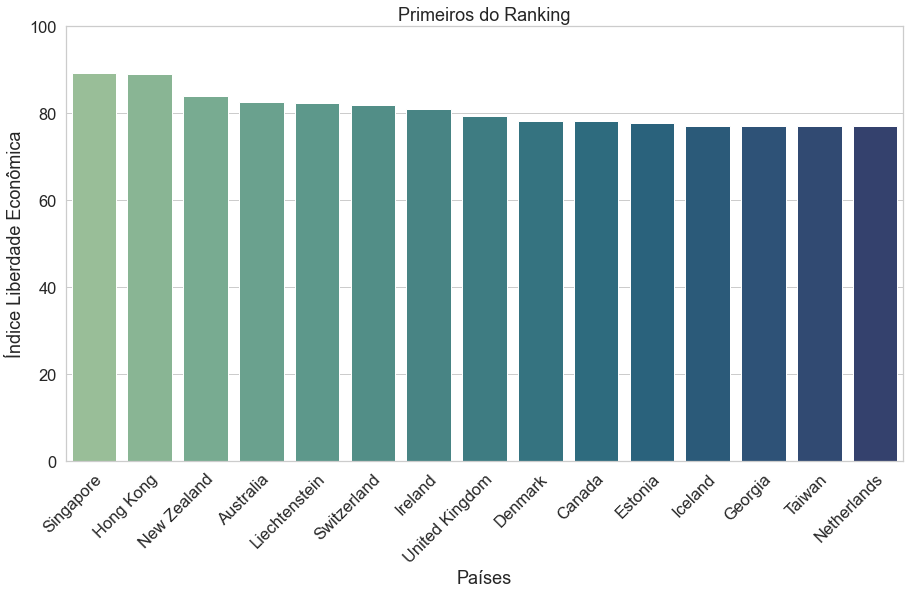

In [19]:
# Gráfico em barras com os melhores países do ranking
sns.set(style="whitegrid", font_scale = 1.5)
plt.figure(figsize = (15,8))
ax = sns.barplot(x="pais", y="ILE", data=liberdade_melhores, orient = "v", palette=sns.color_palette("crest", 15))
ax.set_ylim(0, 100)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45, rotation_mode='anchor', ha='right')
ax.set(xlabel='Países', ylabel='Índice Liberdade Econômica', title='Primeiros do Ranking')
plt.show()

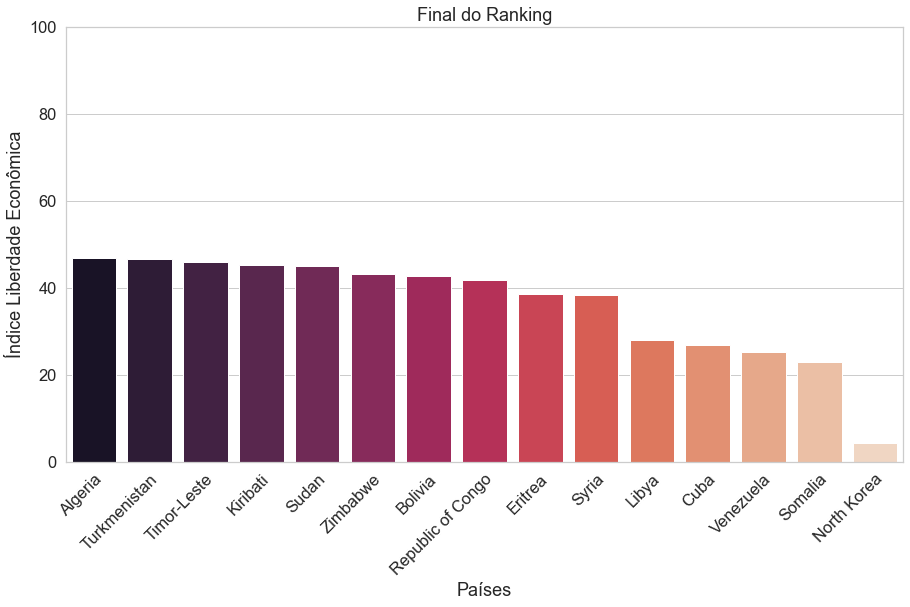

In [20]:
# Gráfico em barras com os piores países do ranking
plt.figure(figsize = (15,8))
ax = sns.barplot(x="pais", y="ILE", data=liberdade_piores, orient = "v", palette=sns.color_palette("rocket", 15))
ax.set_ylim(0, 100)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45, rotation_mode='anchor', ha='right')
ax.set(xlabel='Países', ylabel='Índice Liberdade Econômica', title='Final do Ranking')
plt.show()

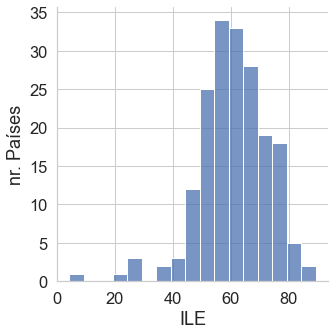

In [21]:
# Histograma de distribuição do índice de liberdade econômica
ax = sns.displot(liberdade['ILE'])
ax.set(ylabel='nr. Países')
plt.show(ax)

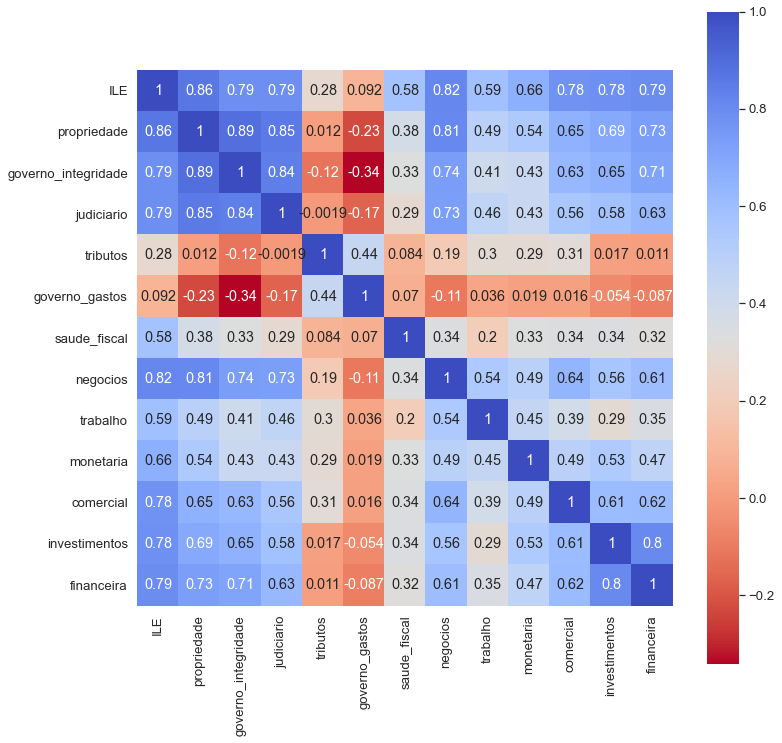

In [22]:
#matriz de correlação (mapa de calor)
sns.set(font_scale=1.2)
plt.figure(figsize=(12,12))
mapa = sns.heatmap(liberdade.corr(),  square=True, annot=True, cmap='coolwarm_r')

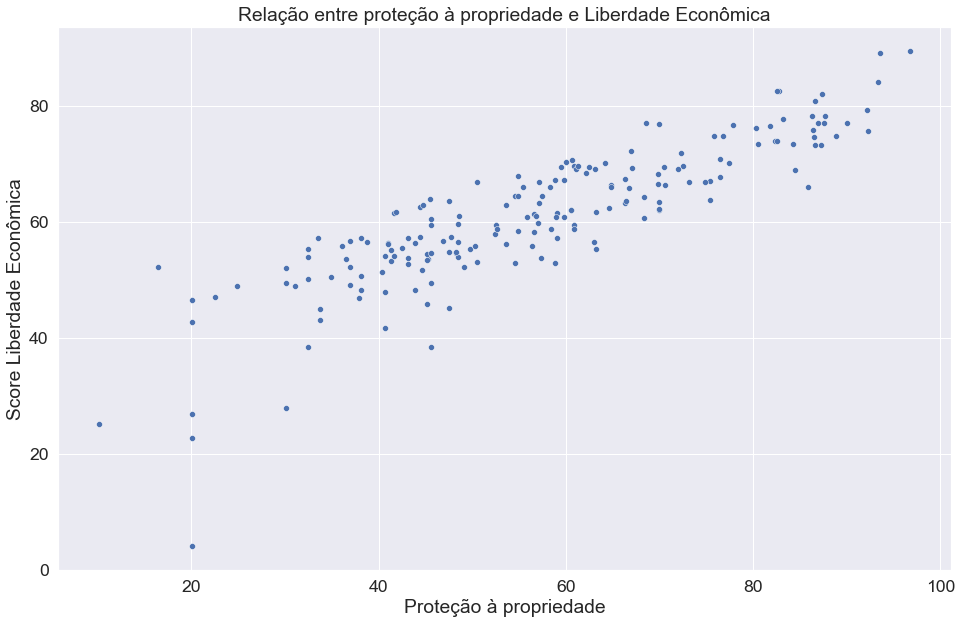

In [24]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.set(font_scale=1.6)

sns.scatterplot(x='propriedade', y='ILE', data=liberdade)
plt.xlabel('Proteção à propriedade')
plt.ylabel('Score Liberdade Econômica')
plt.title('Relação entre proteção à propriedade e Liberdade Econômica')
plt.show()

<br><br><br><br><br>
# Índice de Desenvolvimento Humano

In [25]:
# Importando o data set do Índice de Desenvolvimento Humano (IDH)
idh_caminho = "./liberdade_economica/human_development_2020_modificado.csv"

idh = pd.read_csv(idh_caminho, sep=';')
idh.drop(columns=['HDI rank'], inplace=True)
idh.rename(columns={"Country": "pais",
                     "Human Development Index": "IDH",
                     "Life expectancy at birth": "expectativa_vida",
                     "Expected years of schooling": "anos_escolaridade_prog",
                     "Mean years of schooling": "anos_escolaridade_realiz",
                     "Gross national income (GNI) per capita": "pib_per_capita"}, inplace=True)
idh.set_index('pais')

,IDH,expectativa_vida,anos_escolaridade_prog,anos_escolaridade_realiz,pib_per_capita
pais,,,,,
Burundi,0.433,61.6,11.1,3.3,753.91
Central African Republic,0.397,53.3,7.6,4.3,993.01
Malawi,0.483,64.3,11.2,4.7,1034.68
Congo (Democratic Republic of the),0.480,60.7,9.7,6.8,1062.54
Niger,0.394,62.4,6.5,2.1,1200.90
Mozambique,0.456,60.9,10.0,3.5,1250.41
Liberia,0.480,64.1,9.6,4.8,1258.41
Chad,0.398,54.2,7.3,2.5,1555.37
Yemen,0.470,66.1,8.8,3.2,1593.70


In [26]:
# A tabela possui 186 registros em 6 colunas
idh.shape

(189, 6)

In [27]:
# Verificando valores nulos e tipos inferidos
idh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pais                      189 non-null    object 
 1   IDH                       189 non-null    float64
 2   expectativa_vida          189 non-null    float64
 3   anos_escolaridade_prog    189 non-null    float64
 4   anos_escolaridade_realiz  189 non-null    float64
 5   pib_per_capita            189 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.0+ KB


In [28]:
# O Índice IDH varia de 0 a 1
# sendo o mímino encontrado 0,394 e o maior 0,957
# IDH médio de 0,722 com desvio padrão de 0,1498

# Expectativa de vida mínima 53,3 e máxima 84,9

# pib per capita mínimo 753 e máximo 131.031
# ppc (pib per capita) médio de 20.219 com desvio padrão 21.229
# desvio padrão alto
idh.describe()

,IDH,expectativa_vida,anos_escolaridade_prog,anos_escolaridade_realiz,pib_per_capita
count,189.000000,189.000000,189.000000,189.000000,189.000000
mean,0.722423,72.715873,13.326984,8.726984,20219.726190
std,0.149791,7.386335,2.939055,3.086271,21229.049116
min,0.394000,53.300000,5.000000,1.600000,753.910000
25%,0.602000,67.400000,11.400000,6.400000,4910.210000
50%,0.740000,74.100000,13.200000,9.000000,12707.370000
75%,0.829000,77.900000,15.200000,11.300000,29497.230000
max,0.957000,84.900000,22.000000,14.200000,131031.590000


In [29]:
# Removendo espaços no início e nos finais dos nomes dos países
idh['pais'] = idh['pais'].str.strip()
liberdade['pais'] = liberdade['pais'].str.strip()

#foi utilizada a biblioteca pycountry para realizar a junção, mas não houve sucesso

#Corrigindo diferentes grafias
idh['pais'].replace('Congo (Democratic Republic of the)', 'Democratic Republic of Congo', inplace=True)
idh['pais'].replace('South Sudan', 'Sudan', inplace=True)
idh['pais'].replace('Gambia', 'The Gambia', inplace=True)
idh['pais'].replace('Tanzania (United Republic of)', 'Tanzania', inplace=True)
idh['pais'].replace('Congo', 'Republic of Congo', inplace=True)
idh['pais'].replace('Syrian Arab Republic', 'Syria', inplace=True)
idh['pais'].replace('Micronesia (Federated States of)', 'Micronesia', inplace=True)
idh['pais'].replace('Kyrgyzstan', 'Kyrgyz Republic', inplace=True)
idh['pais'].replace('Venezuela (Bolivarian Republic of)', 'Venezuela', inplace=True)
idh['pais'].replace('Lao People\'s Democratic Republic', 'Laos', inplace=True)
idh['pais'].replace('Viet Nam', 'Vietnam', inplace=True)
idh['pais'].replace('Eswatini (Kingdom of)', 'Eswatini', inplace=True)
idh['pais'].replace('Bolivia (Plurinational State of)', 'Bolivia', inplace=True)
idh['pais'].replace('Iran (Islamic Republic of)', 'Iran', inplace=True)
idh['pais'].replace('Moldova (Republic of)', 'Moldova', inplace=True)
idh['pais'].replace('Russian Federation', 'Russia', inplace=True)
idh['pais'].replace('Slovakia', 'Slovak Republic', inplace=True)
idh['pais'].replace('Bahamas', 'The Bahamas', inplace=True)
idh['pais'].replace('Czechia', 'Czech Republic', inplace=True)
idh['pais'].replace('Korea (Republic of)', 'South Korea', inplace=True)
idh['pais'].replace('Hong Kong China (SAR)', 'Hong Kong', inplace=True)

# Países com IDH que não estão na tabela com dados de Liberdade Econômica
# 1. Sao Tome and Principe
# 2. Myanmar
# 3. Marshall Islands
# 4. Palestine State of
# 5. Grenada
# 6. Palau
# 7. Antigua and Barbuda
# 8. Saint Kitts and Nevis
# 9. Andorra

ile_idh_merge_completo = idh[['pais','IDH']].merge(liberdade, on='pais', how='left', indicator=True)
paises_nao_encontrados = ile_idh_merge_completo[ile_idh_merge_completo['_merge']=='left_only']
paises_nao_encontrados.shape
print(paises_nao_encontrados['pais'].shape)
print('Países com dados de IDH sem dados de Liberdade Econômica:')
paises_nao_encontrados['pais']

(9,)
Países com dados de IDH sem dados de Liberdade Econômica:


38     Sao Tome and Principe
48                   Myanmar
51          Marshall Islands
62        Palestine State of
112                  Grenada
124                    Palau
126      Antigua and Barbuda
132    Saint Kitts and Nevis
173                  Andorra
Name: pais, dtype: object

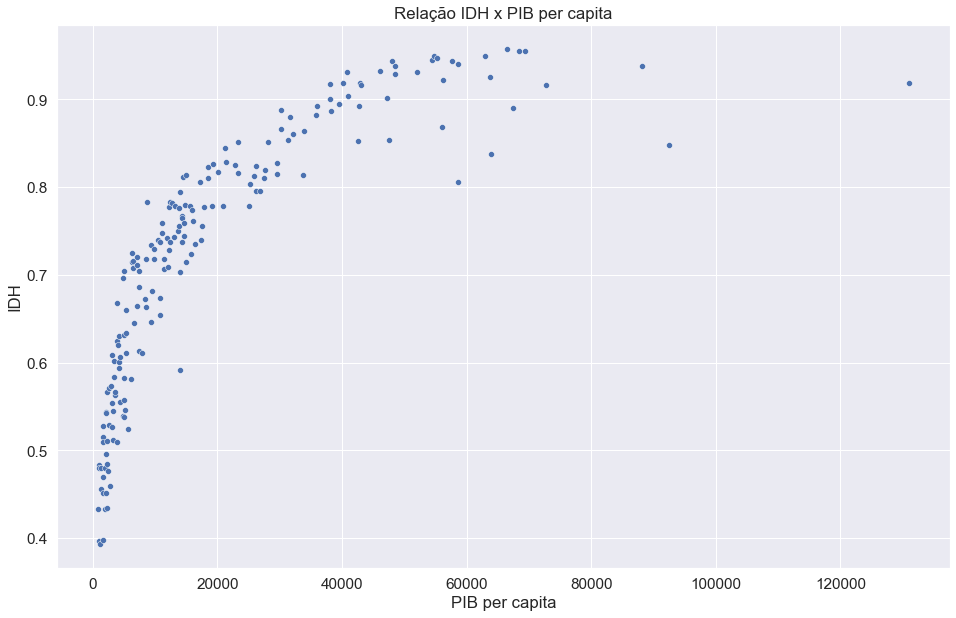

In [30]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.set(font_scale=1.4)

ax = sns.scatterplot(x='pib_per_capita', y='IDH', data=idh)
ax.set(xlabel = 'PIB per capita', ylabel = 'IDH', title='Relação IDH x PIB per capita')
plt.show()

[Text(0, 0.5, 'nr. Países'), Text(0.5, 0, 'PIB per capita')]

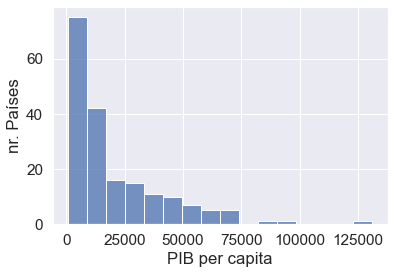

In [31]:
ax = sns.histplot(idh['pib_per_capita'])
ax.set(ylabel = 'nr. Países', xlabel = 'PIB per capita')

[Text(0, 0.5, 'Expectativa de Vida'), Text(0.5, 0, 'PIB per capita')]

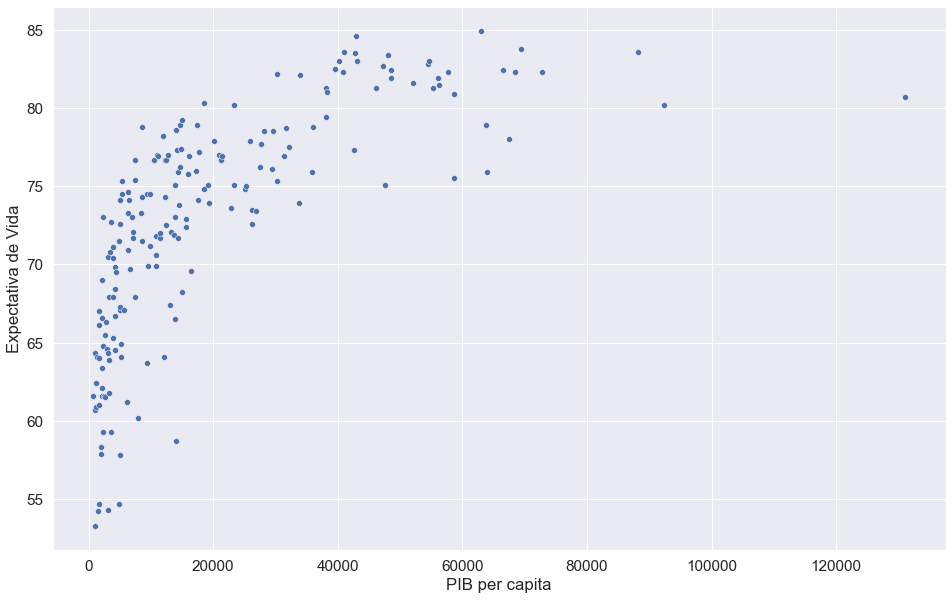

In [32]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.set(font_scale=1.4)

ax = sns.scatterplot(x='pib_per_capita', y='expectativa_vida', data=idh)
ax.set(ylabel = 'Expectativa de Vida', xlabel='PIB per capita')
#possivelmente explica-se pela concentração de riqueza

[Text(22.278125000000017, 0.5, 'Expectativa de Vida'),
 Text(0.5, 22.278124999999996, 'IDH')]

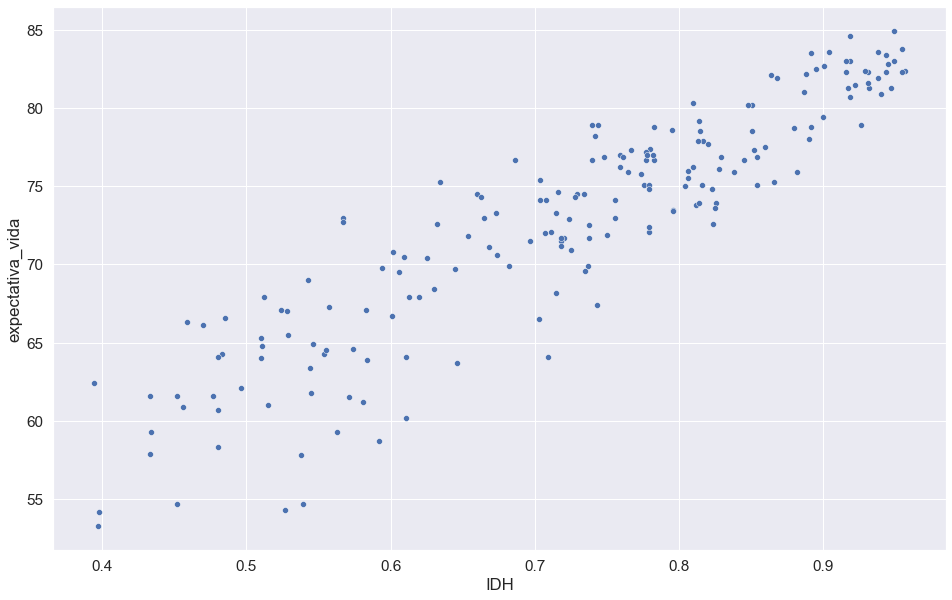

In [33]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.set(font_scale=1.4)

sns.scatterplot(x='IDH', y='expectativa_vida', data=idh)
ax.set(ylabel = 'Expectativa de Vida', xlabel='IDH')

In [37]:
# Países que estão em IDH e não estão em liberdade econômica
ile_idh_merge_completo = idh[['pais','IDH']].merge(liberdade, on='pais', how='left', indicator=True)
paises_nao_encontrados = ile_idh_merge_completo[ile_idh_merge_completo['_merge']=='left_only']
paises_nao_encontrados.shape
print(paises_nao_encontrados['pais'].shape)
paises_nao_encontrados['pais']

(9,)


38     Sao Tome and Principe
48                   Myanmar
51          Marshall Islands
62        Palestine State of
112                  Grenada
124                    Palau
126      Antigua and Barbuda
132    Saint Kitts and Nevis
173                  Andorra
Name: pais, dtype: object

# Liberdade Econômica VS IDH

In [38]:
# Criando a tabela com dados de liberdade econômica e IDH
ile_idh = idh[['pais','IDH']].merge(liberdade.drop(columns=['ILE']), on='pais')
ile_idh.shape

(180, 14)

In [39]:
ile_idh.head()

,pais,IDH,propriedade,governo_integridade,judiciario,tributos,governo_gastos,saude_fiscal,negocios,trabalho,monetaria,comercial,investimentos,financeira
0,Burundi,0.433,24.900000,22.299999,26.900000,73.699997,85.800003,13.200000,55.099998,67.400002,70.300003,68.199997,50.0,30.0
1,Central African Republic,0.397,38.099998,24.299999,31.700001,65.500000,93.500000,95.300003,24.299999,40.400002,73.300003,47.200001,45.0,30.0
2,Malawi,0.483,43.099998,24.799999,42.099998,79.000000,71.699997,23.600000,41.900002,62.799999,69.099998,75.400002,50.0,50.0
3,Democratic Republic of Congo,0.480,30.100000,13.100000,26.500000,74.400002,95.400002,98.000000,51.200001,41.599998,49.599998,64.599998,30.0,20.0
4,Niger,0.394,45.599998,33.400002,42.599998,76.699997,79.000000,44.700001,55.400002,47.900002,74.800003,61.200001,55.0,40.0


In [40]:
ile_idh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pais                 180 non-null    object 
 1   IDH                  180 non-null    float64
 2   propriedade          180 non-null    float32
 3   governo_integridade  180 non-null    float32
 4   judiciario           180 non-null    float32
 5   tributos             180 non-null    float32
 6   governo_gastos       180 non-null    float32
 7   saude_fiscal         180 non-null    float32
 8   negocios             180 non-null    float32
 9   trabalho             180 non-null    float32
 10  monetaria            180 non-null    float32
 11  comercial            180 non-null    float32
 12  investimentos        180 non-null    float32
 13  financeira           180 non-null    float32
dtypes: float32(12), float64(1), object(1)
memory usage: 12.7+ KB


<AxesSubplot:>

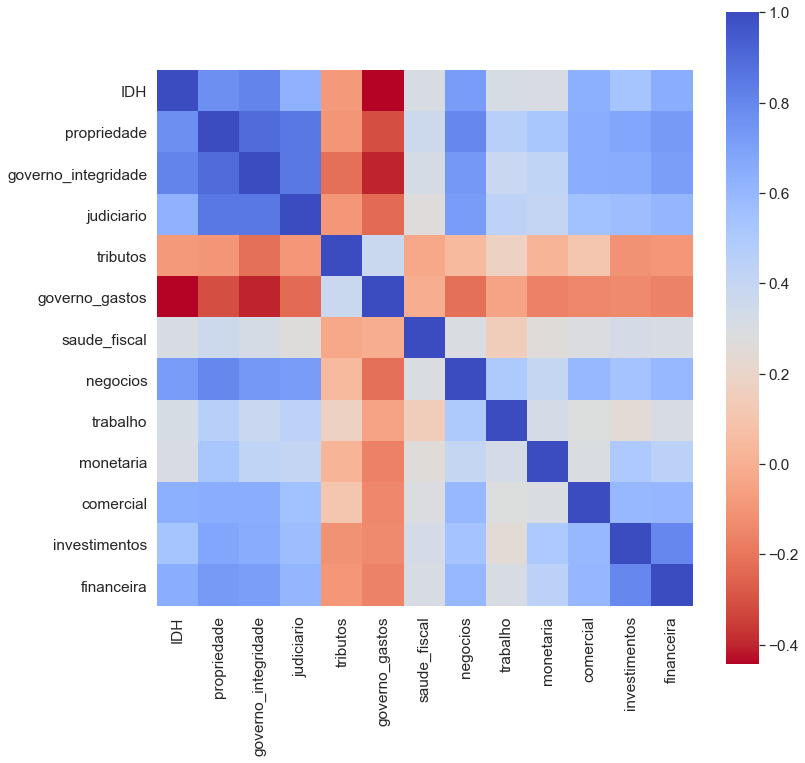

In [41]:
#matriz de correlação
ile_idh_numeros = ile_idh._get_numeric_data()
ile_idh_correlacao = ile_idh_numeros.corr()

#mapa calor correlação
sns.set(font_scale=1.4)

plt.figure(figsize=(12,12))
sns.heatmap(ile_idh_correlacao,  square=True, cmap='coolwarm_r')

In [42]:
regressao_idh = setup(data=ile_idh, target = 'IDH', ignore_features=['pais'], session_id=123)

,Description,Value
0,session_id,123
1,Target,IDH
2,Original Data,"(180, 14)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(125, 12)"


In [43]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0578,0.0056,0.0726,0.7070,0.0445,0.0928,0.0490
gbr,Gradient Boosting Regressor,0.0600,0.0060,0.0750,0.6913,0.0458,0.0955,0.0150
br,Bayesian Ridge,0.0626,0.0061,0.0771,0.6879,0.0467,0.0972,0.0060
lightgbm,Light Gradient Boosting Machine,0.0593,0.0061,0.0771,0.6866,0.0476,0.0961,0.1370
ridge,Ridge Regression,0.0630,0.0062,0.0775,0.6855,0.0467,0.0970,0.0050
lar,Least Angle Regression,0.0630,0.0062,0.0775,0.6855,0.0467,0.0970,0.0050
lr,Linear Regression,0.0630,0.0062,0.0775,0.6855,0.0467,0.0970,0.9130
ada,AdaBoost Regressor,0.0614,0.0062,0.0768,0.6814,0.0471,0.0979,0.0220
rf,Random Forest Regressor,0.0590,0.0066,0.0776,0.6651,0.0475,0.0961,0.0600
knn,K Neighbors Regressor,0.0664,0.0076,0.0840,0.6158,0.0514,0.1069,0.0070


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [44]:
idh_extra_trees = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0899,0.0117,0.1083,0.5548,0.0692,0.1712
1,0.0456,0.0039,0.0625,0.8073,0.0389,0.0748
2,0.0448,0.0030,0.0549,0.9070,0.0335,0.0684
3,0.0600,0.0057,0.0756,0.7933,0.0462,0.0960
4,0.0794,0.0112,0.1057,0.4688,0.0629,0.1217
5,0.0610,0.0049,0.0696,0.8335,0.0435,0.1038
6,0.0585,0.0049,0.0703,0.5697,0.0426,0.0884
7,0.0453,0.0033,0.0577,0.6785,0.0331,0.0586
8,0.0430,0.0027,0.0518,0.8866,0.0321,0.0677
9,0.0506,0.0048,0.0694,0.5705,0.0426,0.0773


In [45]:
idh_extra_trees_tuned = tune_model(idh_extra_trees)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0866,0.0119,0.1091,0.5481,0.0711,0.1760
1,0.0474,0.0039,0.0625,0.8073,0.0390,0.0779
2,0.0621,0.0053,0.0726,0.8375,0.0439,0.0937
3,0.0624,0.0062,0.0787,0.7759,0.0486,0.1021
4,0.0824,0.0095,0.0975,0.5480,0.0583,0.1249
5,0.0835,0.0103,0.1014,0.6471,0.0638,0.1479
6,0.0542,0.0041,0.0637,0.6463,0.0381,0.0797
7,0.0446,0.0033,0.0573,0.6832,0.0323,0.0559
8,0.0547,0.0037,0.0610,0.8426,0.0372,0.0857
9,0.0606,0.0063,0.0792,0.4404,0.0491,0.0957


In [46]:
idh_extra_trees_tuned

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0001,
                    min_impurity_split=None, min_samples_leaf=2,
                    min_samples_split=5, min_weight_fraction_leaf=0.0,
                    n_estimators=240, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

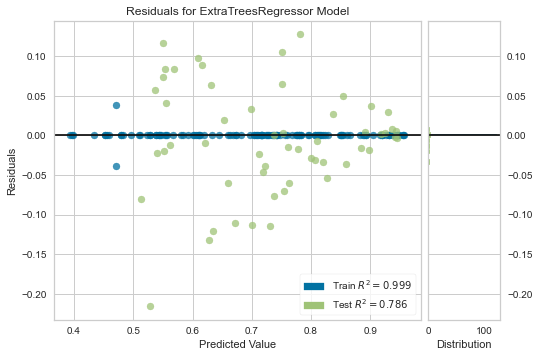

In [47]:
plot_model(idh_extra_trees)

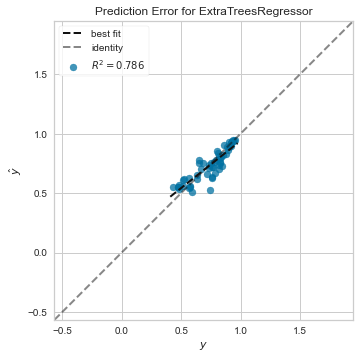

In [48]:
plot_model(idh_extra_trees, plot='error')

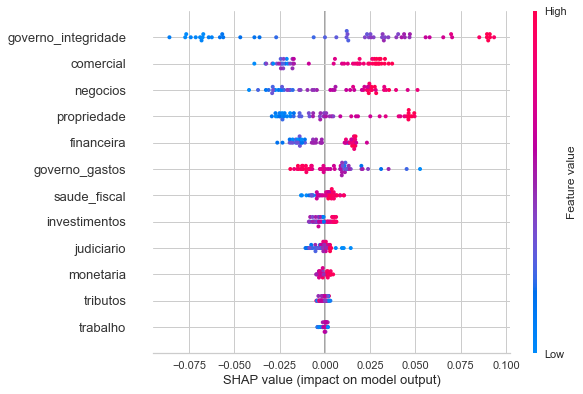

In [49]:
interpret_model(idh_extra_trees)

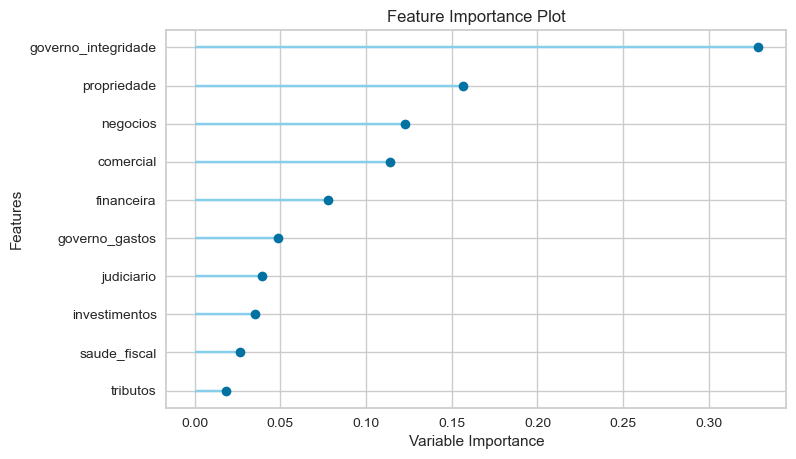

In [50]:
plot_model(idh_extra_trees, plot = 'feature')

In [52]:
ile_idh.loc[ile_idh['pais'] == 'Brazil'].T

,100
pais,Brazil
IDH,0.765
propriedade,57.3
governo_integridade,45.6
judiciario,46.7
tributos,70.4
governo_gastos,54.6
saude_fiscal,4.6
negocios,60.5
trabalho,49.5


In [53]:
previsao = predict_model(idh_extra_trees, data=ile_idh.loc[ile_idh['pais'] == 'Brazil'])
previsao['Label']

100    0.71907
Name: Label, dtype: float64

In [54]:
brasil_modif = ile_idh.loc[ile_idh['pais'] == 'Brazil']
brasil_modif['governo_integridade'] = 75
previsao = predict_model(idh_extra_trees, data=brasil_modif)
previsao['Label']

100    0.73368
Name: Label, dtype: float64

# Liberdade Econômica VS PIB per capita

In [55]:
ile_ppc = idh[['pais','pib_per_capita']].merge(liberdade.drop(columns=['ILE']), on='pais')
regressao_ile_ppc = setup(data=ile_ppc, target = 'pib_per_capita', ignore_features=['pais'], session_id=123)

,Description,Value
0,session_id,123
1,Target,pib_per_capita
2,Original Data,"(180, 14)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(125, 12)"


In [56]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,8184.7767,162386702.8109,11725.3231,0.6821,0.8277,1.2460,0.0330
et,Extra Trees Regressor,7778.4460,163269029.9217,11944.9255,0.6592,0.6967,0.9135,0.0730
omp,Orthogonal Matching Pursuit,8512.6109,183570372.2105,12400.2331,0.6312,0.8525,1.0167,0.0100
rf,Random Forest Regressor,7420.7204,168282349.8074,11804.5759,0.6263,0.7111,0.9898,0.0920
br,Bayesian Ridge,9095.2749,188302835.2291,12733.7287,0.6093,0.9087,1.2809,0.0100
huber,Huber Regressor,8402.3220,206427196.0902,13045.9570,0.6026,0.8210,0.9304,0.0180
knn,K Neighbors Regressor,8205.5409,189940714.8000,12684.8002,0.5948,0.7601,0.9837,0.0120
llar,Lasso Least Angle Regression,9370.4448,188655445.3041,12852.2988,0.5929,0.9777,1.4016,0.0110
en,Elastic Net,9380.3705,188927070.8000,12865.0365,0.5922,0.9766,1.4073,0.0100
lasso,Lasso Regression,9396.0702,189139781.6000,12876.1989,0.5912,0.9839,1.4123,0.0090


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)

In [57]:
ppc_ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6494.3592,50312785.3986,7093.1506,0.7546,1.2254,2.4579
1,7923.5655,102811007.6935,10139.5763,0.6773,0.9321,1.5721
2,8075.2976,83662231.2014,9146.7060,0.8569,0.7863,1.0358
3,6501.2575,89119753.5794,9440.3259,0.7344,0.8430,1.2235
4,9394.8247,150570347.7534,12270.7110,0.4864,1.0341,2.0257
5,11228.5481,505932790.3503,22492.9498,0.5691,0.7933,1.0392
6,5226.9246,39154102.1452,6257.3239,0.8686,0.7170,0.9531
7,11980.6647,287118580.7891,16944.5738,0.4861,0.5992,0.5039
8,5283.8740,52885386.1054,7272.2339,0.9010,0.7396,1.0129
9,9738.4515,262300043.0926,16195.6798,0.4869,0.6066,0.6361


In [59]:
ppc_ada_tuned = tune_model(ppc_ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6598.7664,53511415.2261,7315.1497,0.7390,1.2294,2.5036
1,6134.6629,57614963.7649,7590.4521,0.8192,0.8892,1.4067
2,9225.5245,114410648.6693,10696.2914,0.8043,0.8156,1.0780
3,6815.4479,90531762.5129,9514.8180,0.7302,0.8432,1.2317
4,9187.6298,123393378.8672,11108.2572,0.5791,0.9443,1.5861
5,10990.7128,467795879.1718,21628.5894,0.6016,0.8142,1.1046
6,4779.4229,39011125.4753,6245.8887,0.8691,0.7582,1.0310
7,9634.7504,231965239.4477,15230.4051,0.5848,0.5707,0.4597
8,5235.9905,57698716.7479,7595.9671,0.8920,0.7334,1.0127
9,10039.8821,261302189.4249,16164.8442,0.4888,0.6176,0.6259


In [60]:
ppc_ada_tuned

AdaBoostRegressor(base_estimator=None, learning_rate=0.5, loss='exponential',
                  n_estimators=90, random_state=123)

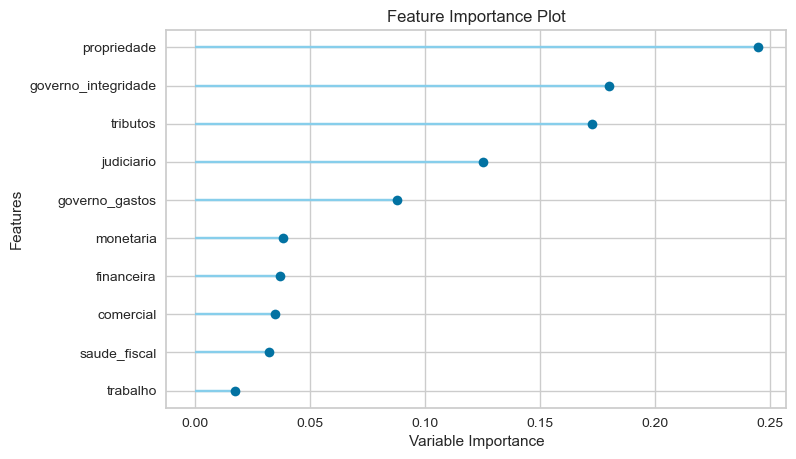

In [61]:
plot_model(ppc_ada_tuned, plot = 'feature')

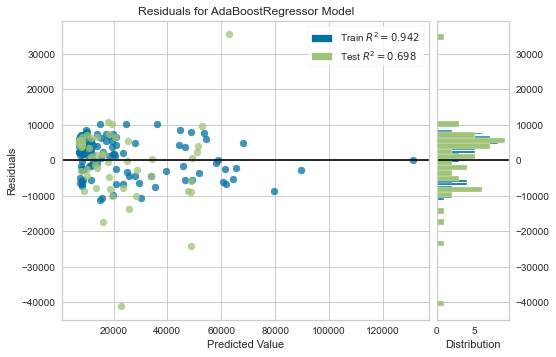

In [62]:
plot_model(ppc_ada_tuned)

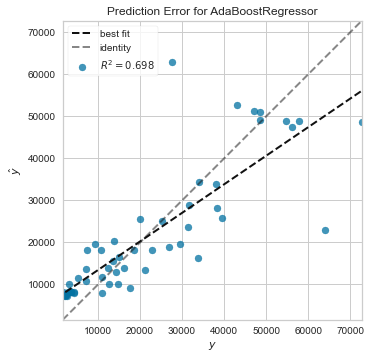

In [63]:
plot_model(ppc_ada_tuned, plot = 'error')

# Liberdade Econômica VS Expectativa de Vida

In [64]:
exp_vida_ile = idh[['pais','expectativa_vida']].merge(liberdade.drop(columns=['ILE']), on='pais')
regressao_exp_vida_ile = setup(data=exp_vida_ile, target = 'expectativa_vida', ignore_features=['pais'], session_id=123)

,Description,Value
0,session_id,123
1,Target,expectativa_vida
2,Original Data,"(180, 14)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(125, 12)"


In [65]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3.3402,18.7997,4.1985,0.6239,0.0609,0.0484,0.0600
lightgbm,Light Gradient Boosting Machine,3.4288,19.3897,4.2701,0.6062,0.0620,0.0496,0.0100
br,Bayesian Ridge,3.7081,21.0645,4.5100,0.5945,0.0641,0.0531,0.0070
lasso,Lasso Regression,3.7124,21.2523,4.5429,0.5859,0.0644,0.0531,0.0090
en,Elastic Net,3.7117,21.4066,4.5602,0.5823,0.0645,0.0530,0.0080
rf,Random Forest Regressor,3.5034,21.0164,4.4400,0.5807,0.0643,0.0508,0.0730
ridge,Ridge Regression,3.7183,21.6122,4.5831,0.5773,0.0647,0.0530,0.0080
lr,Linear Regression,3.7183,21.6128,4.5832,0.5772,0.0647,0.0530,0.0070
lar,Least Angle Regression,3.7183,21.6128,4.5832,0.5772,0.0647,0.0530,0.0090
ada,AdaBoost Regressor,3.4849,20.1058,4.3763,0.5752,0.0632,0.0503,0.0270


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [66]:
exp_vida_model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.1957,28.3569,5.3251,0.4401,0.0771,0.0630
1,3.3102,18.3676,4.2857,0.6688,0.0656,0.0504
2,1.4617,2.7808,1.6676,0.9346,0.0218,0.0191
3,3.3013,18.9122,4.3488,0.7457,0.0640,0.0483
4,3.3585,17.4877,4.1818,0.6100,0.0583,0.0471
5,4.0603,25.9157,5.0907,0.6905,0.0769,0.0608
6,2.8515,13.6946,3.7006,0.3108,0.0540,0.0402
7,2.6768,10.5048,3.2411,0.7539,0.0430,0.0357
8,4.5513,31.2269,5.5881,0.5258,0.0822,0.0666
9,3.6349,20.7501,4.5552,0.5586,0.0659,0.0528


In [67]:
exp_vida_model_tuned = tune_model(exp_vida_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.1041,24.8302,4.9830,0.5098,0.0750,0.0634
1,3.4297,20.6737,4.5468,0.6272,0.0698,0.0526
2,1.4620,2.6173,1.6178,0.9384,0.0207,0.0190
3,3.6459,22.4569,4.7389,0.6980,0.0705,0.0538
4,3.2175,16.3419,4.0425,0.6356,0.0556,0.0444
5,4.5436,32.3795,5.6903,0.6133,0.0847,0.0678
6,2.4726,9.8377,3.1365,0.5049,0.0436,0.0343
7,2.7424,11.1195,3.3346,0.7395,0.0447,0.0369
8,4.4055,28.2720,5.3171,0.5707,0.0781,0.0654
9,3.4305,20.8515,4.5663,0.5564,0.0657,0.0497


In [68]:
exp_vida_model_tuned

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0001,
                    min_impurity_split=None, min_samples_leaf=2,
                    min_samples_split=5, min_weight_fraction_leaf=0.0,
                    n_estimators=240, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

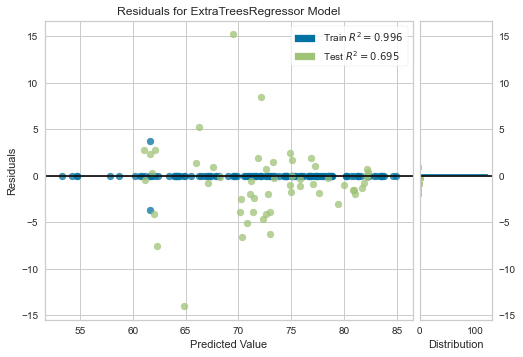

In [69]:
plot_model(exp_vida_model)

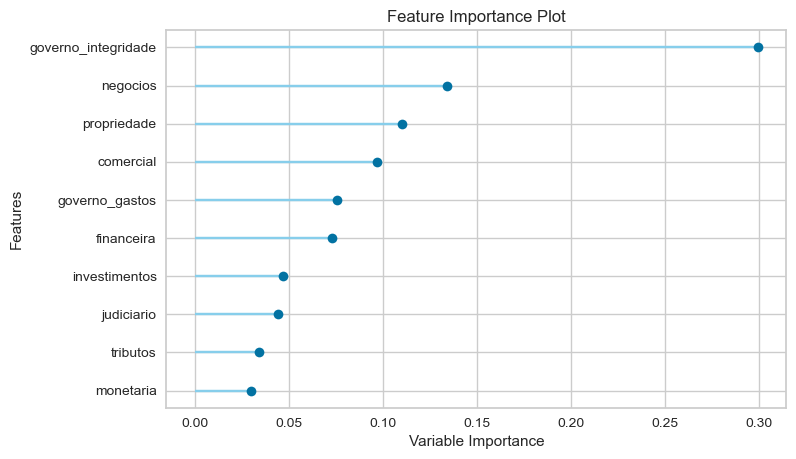

In [70]:
plot_model(exp_vida_model, plot = 'feature')

In [71]:
previsao = predict_model(exp_vida_model, data=exp_vida_ile.loc[exp_vida_ile['pais'] == 'Brazil'])
previsao[['pais','expectativa_vida','Label']]

,pais,expectativa_vida,Label
100,Brazil,75.9,70.780999


In [72]:
brasil_modif = exp_vida_ile.loc[exp_vida_ile['pais'] == 'Brazil']
brasil_modif['governo_integridade'] = 67.5
previsao = predict_model(exp_vida_model, data=brasil_modif)
previsao[['pais','expectativa_vida','Label']]

,pais,expectativa_vida,Label
100,Brazil,75.9,73.327999


# Liberdade Econômica (Geral) VS IDH

In [73]:
ile_vs_idh = idh[['pais','IDH']].merge(liberdade[['pais','ILE']], on='pais')

In [74]:
ile_vs_idh.head(10)

,pais,IDH,ILE
0,Burundi,0.433,49.000000
1,Central African Republic,0.397,50.700001
2,Malawi,0.483,52.799999
3,Democratic Republic of Congo,0.480,49.500000
4,Niger,0.394,54.700001
5,Mozambique,0.456,50.500000
6,Liberia,0.480,49.000000
7,Chad,0.398,50.200001
8,Yemen,0.470,47.139999
9,Madagascar,0.528,60.500000


<AxesSubplot:xlabel='ILE', ylabel='IDH'>

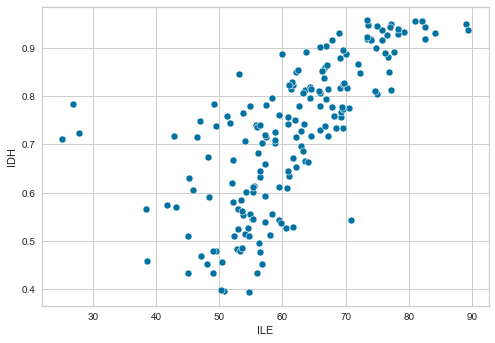

In [75]:
# Verifica-se correlação entre os dados, mostrando que os países com o maior 
#índice de liberdade econômica são aqueles que apresentam maior qualidade de vida

#outliers mostram também que é possível existir país com baixa liberdade econômica e IDH intermediário
sns.scatterplot(data=ile_vs_idh, x='ILE', y='IDH')

In [76]:
tributos_vs_idh = idh[['pais','IDH']].merge(liberdade[['pais','tributos']], on='pais')

<AxesSubplot:xlabel='tributos', ylabel='IDH'>

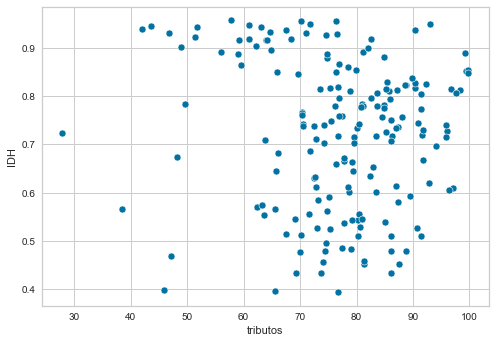

In [77]:
# análise dos tributos vs IDH
sns.scatterplot(data=tributos_vs_idh, x='tributos', y='IDH')